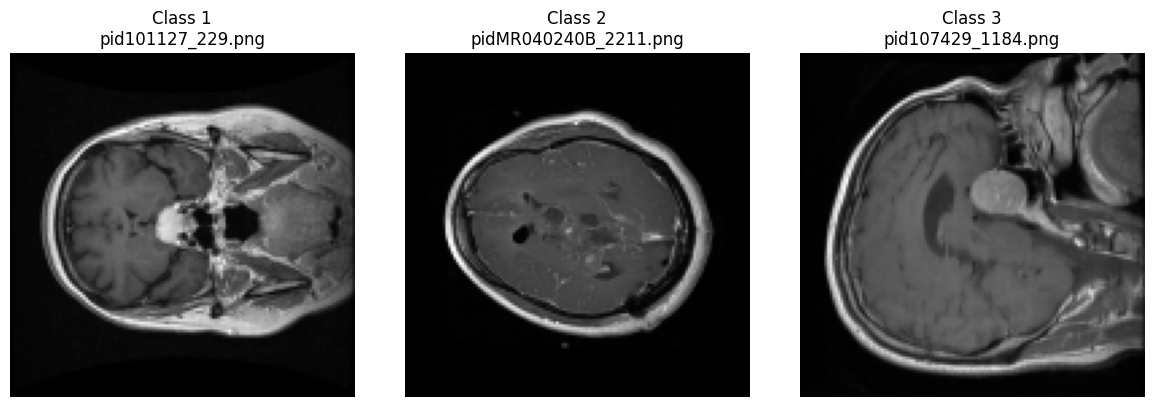

In [ ]:
import random, glob, os
import matplotlib.pyplot as plt
import cv2
import numpy as np

base_img = "../outputs/ce_mri_images"
base_mask = "../outputs/ce_mri_masks"

labels = sorted([d for d in os.listdir(base_img) if os.path.isdir(os.path.join(base_img, d))])

# Display one random sample from each class (image only)
fig, ax = plt.subplots(1, len(labels), figsize=(4*len(labels), 4))
for i, l in enumerate(labels):
    files = glob.glob(os.path.join(base_img, l, "*.png"))
    if files:
        chosen = random.choice(files)
        img = cv2.imread(chosen, cv2.IMREAD_GRAYSCALE)
        ax[i].imshow(img, cmap='gray')
        ax[i].set_title(f"Class {l}\n{os.path.basename(chosen)}")
        ax[i].axis('off')
plt.tight_layout()
plt.show()

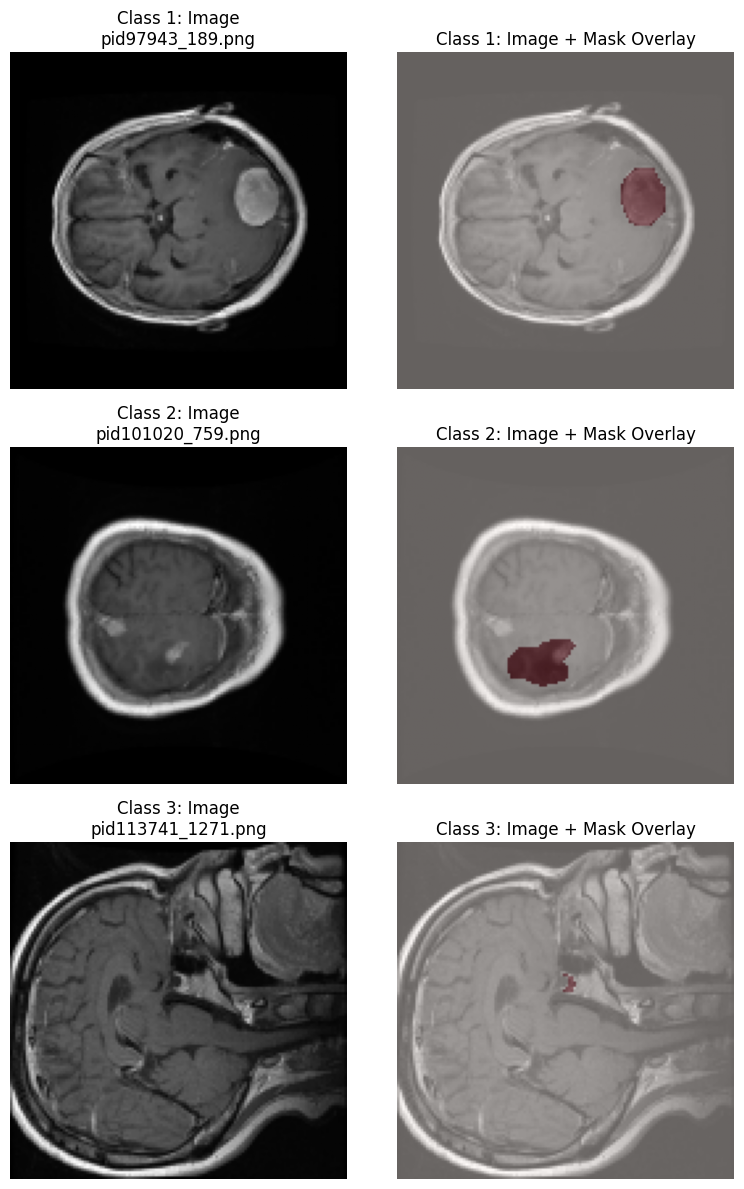

In [ ]:
# Display random samples WITH tumor mask overlay
fig, axes = plt.subplots(len(labels), 2, figsize=(8, 4*len(labels)))
if len(labels) == 1:
    axes = axes.reshape(1, -1)

for i, l in enumerate(labels):
    img_files = glob.glob(os.path.join(base_img, l, "*.png"))
    if img_files:
        # Pick a random image
        chosen = random.choice(img_files)
        fname = os.path.basename(chosen)
        
        # Load image
        img = cv2.imread(chosen, cv2.IMREAD_GRAYSCALE)
        
        # Try to load corresponding mask
        mask_path = os.path.join(base_mask, l, fname)
        mask = None
        if os.path.exists(mask_path):
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
        # Display image only
        axes[i, 0].imshow(img, cmap='gray')
        axes[i, 0].set_title(f"Class {l}: Image\n{fname}")
        axes[i, 0].axis('off')
        
        # Display image with mask overlay
        axes[i, 1].imshow(img, cmap='gray')
        if mask is not None:
            # Create colored overlay where mask > 0
            mask_overlay = np.zeros_like(img)
            mask_overlay[mask > 0] = 255
            axes[i, 1].imshow(mask_overlay, cmap='Reds', alpha=0.4)
            axes[i, 1].set_title(f"Class {l}: Image + Mask Overlay")
        else:
            axes[i, 1].set_title(f"Class {l}: No mask found")
        axes[i, 1].axis('off')

plt.tight_layout()
plt.show()